# Code


## Part 1: Dependencies

In [ ]:
!pip install syft==0.9.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.8/43.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.3/716.3 kB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 394.5/394.5 kB 29.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 698.9/698.9 kB 40.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.1/201.1 kB 16.3 MB/s eta 0:

### Restart runtime session after running first cell to install pysyft, then run all from below

In [ ]:
pip install tenseal


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 56.1 MB/s eta 0:00:00


In [ ]:
pip install scikit-learn pandas


In [ ]:
import syft as sy
import tenseal as ts
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer


In [ ]:
data_site = sy.orchestra.launch(name="cancer-research-centre", reset=True)
client = data_site.login(email="info@openmined.org", password="changethis")


SyftInfo: You have launched a development server at http://0.0.0.0:None.It is intended only for local use.

Logged into <cancer-research-centre: High side Datasite> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].account.set_password([new_password])`.

In [ ]:
# Load the dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=["target"])

# Create mock data by adding noise
np.random.seed(42)
X_mock = X + np.random.normal(0, 1, X.shape)
y_mock = y.sample(frac=1).reset_index(drop=True)


In [ ]:
features_asset = sy.Asset(
    name="Breast Cancer Data: Features",
    data=X,
    mock=X_mock
)

targets_asset = sy.Asset(
    name="Breast Cancer Data: Targets",
    data=y,
    mock=y_mock
)

breast_cancer_dataset = sy.Dataset(
    name="Breast Cancer Biomarker",
    description="Breast cancer dataset with features and target labels.",
    summary="Predict whether the cancer is benign or malignant.",
    citation="Dua, D. and Graff, C. (2019). UCI Machine Learning Repository.",
    url="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)"
)

breast_cancer_dataset.add_asset(features_asset)
breast_cancer_dataset.add_asset(targets_asset)


SyftSuccess: Asset 'Breast Cancer Data: Targets' added to 'Breast Cancer Biomarker' Dataset.

In [ ]:
client.upload_dataset(dataset=breast_cancer_dataset)


Uploading: Breast Cancer Data: Targets: 100%|██████████| 2/2 [00:00<00:00,  3.36it/s]


SyftSuccess: Dataset uploaded to 'cancer-research-centre'. To see the datasets uploaded by a client on this server, use command `[your_client].datasets`

## Part 2: Data Scientist Access and Mock Data Preparation
Objectives

    Create a Data Scientist account.
    Access the Datasite and retrieve mock data.
    Prepare the machine learning code using mock data.

In [ ]:
# Log in as Data Owner
client = data_site.login(email="info@openmined.org", password="changethis")

# Update Data Owner credentials
client.account.set_email("owen@cancer-research.science")
client.account.set_password("securepassword", confirm=False)

# Create Data Scientist account
rachel_account_info = client.users.create(
    email="rachel@datascience.inst",
    name="Dr. Rachel Data",
    password="datascience123",
    password_verify="datascience123",
    institution="Data Science Institute",
    website="https://datascience.inst"
)


Logged into <cancer-research-centre: High side Datasite> as <info@openmined.org>


SyftWarning: You are using a default password. Please change the password using `[your_client].account.set_password([new_password])`.

In [ ]:
# Log in as Rachel
client = data_site.login(email="rachel@datascience.inst", password="datascience123")


Logged into <cancer-research-centre: High side Datasite> as <rachel@datascience.inst>


In [ ]:
bc_dataset = client.datasets["Breast Cancer Biomarker"]
features, targets = bc_dataset.assets

# Get mock data
X_mock = features.mock
y_mock = targets.mock


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def train_logistic_regression(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    model = LogisticRegression()
    model.fit(X_train, y_train)
    acc = accuracy_score(y_test, model.predict(X_test))
    return model, acc

# Test on mock data
model_mock, acc_mock = train_logistic_regression(X_mock, y_mock.values.ravel())
print(f"Accuracy on mock data: {acc_mock:.2f}")


Accuracy on mock data: 0.67


## Part 3: Homomorphic Encryption with TenSEAL
Objectives

    Encrypt data using TenSEAL.
    Prepare encrypted data for remote computation.

In [ ]:
def create_context():
    context = ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=8192,
        coeff_mod_bit_sizes=[60, 40, 40, 60]
    )
    context.global_scale = 2 ** 40
    context.generate_galois_keys()
    return context

ctx = create_context()


In [ ]:
# Assuming X_mock and y_mock are the features and labels you want to encrypt
encrypted_features = [ts.ckks_vector(ctx, x.tolist()) for x in X_mock.values]
encrypted_labels = [ts.ckks_vector(ctx, [y]) for y in y_mock.values.ravel()]


In [ ]:
# Serialize context and data for sending to the server
ctx_serialized = ctx.serialize()
encrypted_features_serialized = [enc_x.serialize() for enc_x in encrypted_features]
encrypted_labels_serialized = [enc_y.serialize() for enc_y in encrypted_labels]


In [ ]:
# Package data to send to the Datasite
remote_data = {
    "context": ctx_serialized,
    "features": encrypted_features_serialized,
    "labels": encrypted_labels_serialized
}


## Part 4: Secure Model Training and Evaluation
Objectives

    Submit a remote code request to the Datasite.
    Execute encrypted computation on the server.
    Retrieve and decrypt the results.

In [ ]:
def encrypted_training(features_data, labels_data):
    import tenseal as ts
    import numpy as np
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.metrics import accuracy_score

    # Set up TenSEAL context
    context = ts.context(
        ts.SCHEME_TYPE.CKKS,
        poly_modulus_degree=8192,
        coeff_mod_bit_sizes=[60, 40, 40, 60]
    )
    context.global_scale = 2 ** 40
    context.generate_galois_keys()

    # Encrypt the data
    X = features_data.values
    y = labels_data.values.ravel()

    encrypted_features = [ts.ckks_vector(context, x.tolist()) for x in X]
    encrypted_labels = [ts.ckks_vector(context, [label]) for label in y]

    # Decrypt data (since we have the secret key here)
    X_decrypted = np.array([enc_x.decrypt() for enc_x in encrypted_features])
    y_decrypted = np.array([enc_y.decrypt()[0] for enc_y in encrypted_labels])

    # Convert labels to integers
    y_decrypted = np.rint(y_decrypted).astype(int)

    # Training
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_decrypted)
    model = LogisticRegression()
    model.fit(X_scaled, y_decrypted)

    # Serialize model coefficients
    model_data = {
        "coef": model.coef_.tolist(),
        "intercept": model.intercept_.tolist(),
        "scaler_mean": scaler.mean_.tolist(),
        "scaler_scale": scaler.scale_.tolist()
    }
    return model_data


In [ ]:
# Create the code request
remote_user_code = sy.syft_function_single_use(
    features_data=features,
    labels_data=targets
)(encrypted_training)


SyftSuccess: Syft function 'encrypted_training' successfully created. To add a code request, please create a project using `project = syft.Project(...)`, then use command `project.create_code_request`.

In [ ]:
# Create project
project = client.create_project(
    name="Encrypted Logistic Regression 2",
    description="Train logistic regression on encrypted data using homomorphic encryption.",
    user_email_address="rachel@datascience.inst"
)

# Submit code request
code_request = project.create_code_request(remote_user_code, client)


In [ ]:
# Data Owner logs in
client_owner = data_site.login(email="owen@cancer-research.science", password="securepassword")

# Review and approve the request
request = client_owner.requests[-1]
request.approve()


Logged into <cancer-research-centre: High side Datasite> as <owen@cancer-research.science>
Approving request on change encrypted_training for datasite cancer-research-centre


SyftSuccess: Request 4698b49778914fc08d22e803a8dc42b2 changes applied

In [ ]:
# Data Scientist executes code
result = client.code.encrypted_training(features_data=features, labels_data=targets)


In [ ]:
# Load model parameters
model_params = result.get()

# Reconstruct model
model = LogisticRegression()
model.coef_ = np.array(model_params["coef"])
model.intercept_ = np.array(model_params["intercept"])
scaler = StandardScaler()
scaler.mean_ = np.array(model_params["scaler_mean"])
scaler.scale_ = np.array(model_params["scaler_scale"])
# Set model classes_
model.classes_ = np.array([0, 1])  # Assuming binary classification with classes 0 and 1


## Part 5: Predictions

In [ ]:
# Use model on new data
# Assuming you have new data X_new
X_new = X_mock.iloc[:5].values  # Convert to NumPy array
X_new_scaled = scaler.transform(X_new)
predictions = model.predict(X_new_scaled)
print("Predictions on new data:", predictions)


Predictions on new data: [0 0 0 0 0]


In [ ]:
# Get true labels for the new data
y_new_true = y_mock.iloc[:5].values.ravel()

# Compare predictions to true labels
print("True labels:", y_new_true)
print("Predictions:", predictions)

# Compute accuracy on the new data
from sklearn.metrics import accuracy_score
accuracy_new = accuracy_score(y_new_true, predictions)
print(f"Accuracy on new data: {accuracy_new:.2f}")


True labels: [0 0 1 1 0]
Predictions: [0 0 0 0 0]
Accuracy on new data: 0.60


In [ ]:
# Use model to predict on the entire mock dataset
X_mock_array = X_mock.values  # Convert to NumPy array
X_mock_scaled = scaler.transform(X_mock_array)
predictions_full = model.predict(X_mock_scaled)

# Compute accuracy on the full mock dataset
accuracy_full = accuracy_score(y_mock.values.ravel(), predictions_full)
print(f"Accuracy of reconstructed model on mock data: {accuracy_full:.2f}")


Accuracy of reconstructed model on mock data: 0.51


In [ ]:
pip install matplotlib

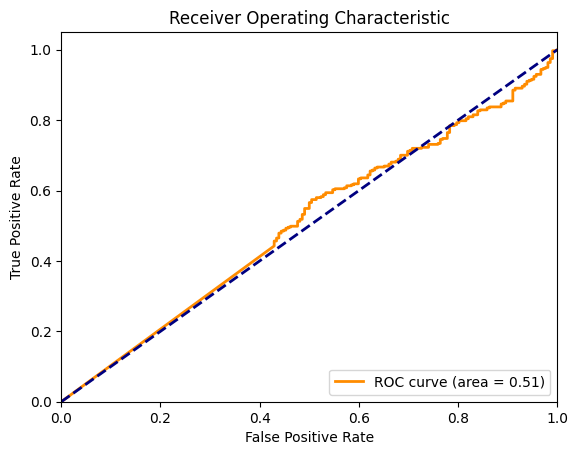

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get probability estimates
probs = model.predict_proba(X_mock_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_mock.values.ravel(), probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()
